## Vignere Cipher

The text is encrypted by adding a number from the key modulo 26 to a number
from the plaintext, where we run through the key over and over again as needed as we run through the
plaintext.

As an equation, the $i^{th}$ character is encrypted like this:
$C_i = (P_i + K_{imod L})mod 26$

here,

P is the plain text.  
K in the key.  
and L is the lenght of the key.

In [1]:
ALPHABET = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [2]:
# Here is a Python routine that encrypts a text:

def encrypt(plaintext,key):
    ciphertext = ''
    for i in range(len(plaintext)):
        
        # Finding index value of current character.
        p = ALPHABET.index(plaintext[i])
        
        # Finding index value of key from which it will get shifted.
        k = ALPHABET.index(key[i%len(key)])
        
        # Finding shifted index value of cipher character.
        c = (p + k) % 26
        
        # Converting cipher index value to cipher character and appending it to ciphertext.
        ciphertext += ALPHABET[c]
        
    # Returning Cipher text.
    return ciphertext


In [3]:
# Decryption is simply the inverse. In other words, instead of adding, we subtract.

def decrypt(ciphertext,key):
    plaintext = ''
    for i in range(len(ciphertext)):
        
        # Finding index value of current character.
        p = ALPHABET.index(ciphertext[i])
        
        # Finding index value of key from which it will get shifted.
        k = ALPHABET.index(key[i%len(key)])
        
        # Finding shifted index value of plain text character.
        c = (p - k) % 26
        
        # Converting plain text index value to plain text character and appending it to plaintext.
        plaintext += ALPHABET[c]
        
    return plaintext

## Index of Coincidence (IOC) .

The index of coincidence (IoC) measures the likelihood that any two characters of a text are the same. 

A concise formula for the IoC is 

$I = 26 * \sum_{i=A}^{Z} ni (ni - 1) / N (N - 1)$  

where,  
$n_i$ are the counts of the letters in the text, and  
$N$ is the total number of characters

With this normalization, a random text has an IoC close to 1, while English text is close to 1.7




In [4]:
# Python code that finds the IOC:

def index_of_coincidence(text):
    counts = [0]*36
    
    # Counting occurance of every character.
    for char in text:
        counts[ALPHABET.index(char)] += 1
        
    # Calculating Summation of Index of Coincidence for thr current text.
    numer = 0
    total = 0
    for i in range(26):
        numer += counts[i]*(counts[i]-1)
        total += counts[i]
    
    # Retrun the calculated Ioc.
    return 26*numer / (total*(total-1))


## Calculating key length.

To use the IoC to find the period or key length of the cipher, 
* we cut the ciphertext into m slices, where each slicecontains every $m^{th}$ letter. 
* Then we find the IoC for each slice and average them. We do this for various choices of m.
* The smallest m with an average IoC close to 1.7 is our period.

In [5]:
# Putting it all together, here is the Python code that finds the period:

# lenght of ALPHABETs for us is equal to 26.
ALPHABET = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' 

# Ciphertext obtained from the CTF server. We have converted the cipher text to uppercase for ease of performing operations.
# ciphertext ='CsgrgzmvksynytbmpgkuiswhgrejsxthvhvftkkxgrfsgxgtvoraexklaCfztabittvpltwpqgpvwuvxjemrvmmshpibzolmpgkuigjmnikljuzmpdzimjcensrahmzswpjgsiwqouevggbicnuvrzmvcckjmzpiccybxnmvknrgszipnyrastgqqujzetvitTnbtkzwqnjzeembehrakkuiusrtiykspdlpxhcwknvfwgvhpexbxoixgecrgzzspitpstbvcckfaoblqukrzkzoponvrmblgtihitiqgoiyimipkdvaxobcqfkuiublgrZaxkzeetzbrywzgrerxcwvmsnvprjiwnkeeimedlvimgmbveefmbmvgrfhxovkqfvagxgtveuceisivsrahziqreicvuwjdoorwcpmehzztrmqgnkpvexxqgintnqgrrfgsiwpuwzgltmetlpcixnietrfwazepcvnkgqrutracziqreivrmZiruknxowruwzyphmshcvaxxipkmgbvzireewnvswvgidcsxbeptzahkipknxfxnirgvvaxnmgteuvxxixknxfslbsfapGlkaifemrpuxqgnkfaotpclkrviwqrlvgirgxjeenxaziqfxbzkzroeegvkoynakvstblgasvpobcvoknbgvheoegvutieoebqokmptveeibmqnjglkifklzgczwogegvrlwvoakvstaiervgetlaklcrzkventvexnmrctleiunxtujgetlvgplgezqspYfhvlteiijseing61267282gd174r9900nih71n4jf'
ciphertext ='CsgrgzmvksynytbmpgkuiswhgrejsxthvhvftkkxgrfsgxgtvoraexklaCfztabittvpltwpqgpvwuvxjemrvmmshpibzolmpgkuigjmnikljuzmpdzimjcensrahmzswpjgsiwqouevggbicnuvrzmvcckjmzpiccybxnmvknrgszipnyrastgqqujzetvitTnbtkzwqnjzeembehrakkuiusrtiykspdlpxhcwknvfwgvhpexbxoixgecrgzzspitpstbvcckfaoblqukrzkzoponvrmblgtihitiqgoiyimipkdvaxobcqfkuiublgrZaxkzeetzbrywzgrerxcwvmsnvprjiwnkeeimedlvimgmbveefmbmvgrfhxovkqfvagxgtveuceisivsrahziqreicvuwjdoorwcpmehzztrmqgnkpvexxqgintnqgrrfgsiwpuwzgltmetlpcixnietrfwazepcvnkgqrutracziqreivrmZiruknxowruwzyphmshcvaxxipkmgbvzireewnvswvgidcsxbeptzahkipknxfxnirgvvaxnmgteuvxxixknxfslbsfapGlkaifemrpuxqgnkfaotpclkrviwqrlvgirgxjeenxaziqfxbzkzroeegvkoynakvstblgasvpobcvoknbgvheoegvutieoebqokmptveeibmqnjglkifklzgczwogegvrlwvoakvstaiervgetlaklcrzkventvexnmrctleiunxtujgetlvgplgezqspYfhvlteiijseing'
ciphertext = ciphertext.upper()

found = False
period = 0
while not found:
    period += 1
    
    # Slice variable will store the cipher text sampled at the specified period.
    slices = ['']*period
    
    # Taking characters from Cipher text at a period and storing them to slice variable.
    for i in range(len(ciphertext)):
        slices[i%period] += ciphertext[i]

    sum = 0
       
    # Calculating Ioc for the period.
    for i in range(period):
        sum += index_of_coincidence(slices[i])
        
    ioc = sum / period
    
    # A random text will have IoC close to 1, while English text will be close to 1.7
    if ioc > 1.6:
        found = True
        
print("Key length obtained from cipher text is :", period)

Key length obtained from cipher text is : 8


In [7]:
# Acquired Engfreq.txt from http://practicalcryptography.com/cryptanalysis/letter-frequencies-various-languages/english-letter-frequencies/ 
# The frequencies from this page are generated from around 4.5 billion characters of English text.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading Frequency Data 
Engfreq = pd.read_csv('EngFreq.txt',sep = ' ')
print(Engfreq)

   char       freq
0     E  529117365
1     T  390965105
2     A  374061888
3     O  326627740
4     I  320410057
5     N  313720540
6     S  294300210
7     R  277000841
8     H  216768975
9     L  183996130
10    D  169330528
11    C  138416451
12    U  117295780
13    M  110504544
14    F   95422055
15    G   91258980
16    P   90376747
17    W   79843664
18    Y   75294515
19    B   70195826
20    V   46337161
21    K   35373464
22    J    9613410
23    X    8369915
24    Z    4975847
25    Q    4550166


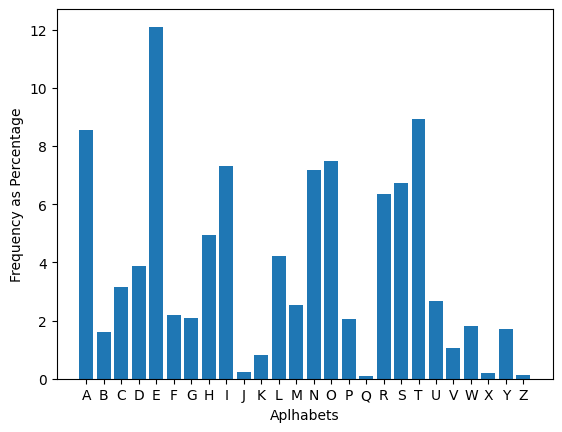

In [8]:
# Making the characters as the index of the dataframe.
Engfreq = Engfreq.set_index('char')

# Calculating frequency percentages.
Engfreq['percent'] = 100 * Engfreq['freq']/Engfreq['freq'].sum()

# Sorting based on alphabets i.e the index of the dataframe.
Engfreq = Engfreq.sort_index(axis = 0)

# Plotting the frequencies for the english letters.
char = np.array(Engfreq.index)
freq = np.array(Engfreq['percent'])
plt.bar(char,freq)
plt.xlabel('Aplhabets')
plt.ylabel('Frequency as Percentage')
plt.show()

In [9]:
from math import sqrt
def cosangle(x,y):
    numerator = 0
    lengthx2 = 0
    lengthy2 = 0
    for i in range(len(x)):
        numerator += x[i]*y[i]
        lengthx2 += x[i]*x[i]
        lengthy2 += y[i]*y[i]
    return numerator / sqrt(lengthx2*lengthy2)

monofrequencies = freq

frequencies = []
for i in range(period):
    frequencies.append([0]*26)
    for j in range(len(slices[i])):
        frequencies[i][ALPHABET.index(slices[i][j])] += 1
    for j in range(26):
        frequencies[i][j] = frequencies[i][j] / len(slices[i])
    
key = ['A']*period
for i in range(period):
    for j in range(26):
        testtable = frequencies[i][j:]+frequencies[i][:j]
        if cosangle(monofrequencies,testtable) > 0.9:
            key[i] = ALPHABET[j]
            
print("Key for vignere Cipher is :",''.join(key))

# ciphertext ='csgrgzmvksynytbmpgkuiswhgrejsxthvhvftkkxgrfsgxgtvoraexklaCfztabittvpltwpqgpvwuvxjemrvmmshpibzolmpgkuigjmnikljuzmpdzimjcensrahmzswpjgsiwqouevggbicnuvrzmvcckjmzpiccybxnmvknrgszipnyrastgqqujzetvitTnbtkzwqnjzeembehrakkuiusrtiykspdlpxhcwknvfwgvhpexbxoixgecrgzzspitpstbvcckfaoblqukrzkzoponvrmblgtihitiqgoiyimipkdvaxobcqfkuiublgrZaxkzeetzbrywzgrerxcwvmsnvprjiwnkeeimedlvimgmbveefmbmvgrfhxovkqfvagxgtveuceisivsrahziqreicvuwjdoorwcpmehzztrmqgnkpvexxqgintnqgrrfgsiwpuwzgltmetlpcixnietrfwazepcvnkgqrutracziqreivrmZiruknxowruwzyphmshcvaxxipkmgbvzireewnvswvgidcsxbeptzahkipknxfxnirgvvaxnmgteuvxxixknxfslbsfapGlkaifemrpuxqgnkfaotpclkrviwqrlvgirgxjeenxaziqfxbzkzroeegvkoynakvstblgasvpobcvoknbgvheoegvutieoebqokmptveeibmqnjglkifklzgczwogegvrlwvoakvstaiervgetlaklcrzkventvexnmrctleiunxtujgetlvgplgezqspYfhvlteiijseing61267282gd174r9900nih71n4jf'.upper()
plaintext = decrypt(ciphertext,key)
print("\nDecrypted message will be :\n", plaintext)

Key for vignere Cipher is : CARNEGIE

Decrypted message will be :
 ASPECTERISHAUNTINGTHEMODERNWORLDTHESPECTEROFCRYPTOANARCHYCOMPUTERTECHNOLOGYISONTHEVERGEOFPROVIDINGTHEABILITYFORINDIVIDUALSANDGROUPSTOCOMMUNICATEANDINTERACTWITHEACHOTHERINATOTALLYANONYMOUSMANNERTWOPERSONSMAYEXCHANGEMESSAGESCONDUCTBUSINESSANDNEGOTIATEELECTRONICCONTRACTSWITHOUTEVERKNOWINGTHETRUENAMEORLEGALIDENTITYOFTHEOTHERINTERACTIONSOVERNETWORKSWILLBEUNTRACEABLEVIAEXTENSIVEREROUTINGOFENCRYPTEDPACKETSANDTAMPERPROOFBOXESWHICHIMPLEMENTCRYPTOGRAPHICPROTOCOLSWITHNEARLYPERFECTASSURANCEAGAINSTANYTAMPERINGREPUTATIONSWILLBEOFCENTRALIMPORTANCEFARMOREIMPORTANTINDEALINGSTHANEVENTHECREDITRATINGSOFTODAYTHESEDEVELOPMENTSWILLALTERCOMPLETELYTHENATUREOFGOVERNMENTREGULATIONTHEABILITYTOTAXANDCONTROLECONOMICINTERACTIONSTHEABILITYTOKEEPINFORMATIONSECRETANDWILLEVENALTERTHENATUREOFTRUSTANDREPUTATIONYOURFLAGISFACFC


### Key obtained was 'CARNEGIE' and the Flag obtained was 'facfc61267282ed174a9900aeb71f4fd'